In [105]:
import pandas as pd
import matplotlib.pyplot as plt
#Reading the historical data from the Coin Market Cap csv from github, which I downloaded to my computer
train = pd.read_csv("hist.txt")

# Graph of the historical Bitcoin Volume data from coinmarketcap csv

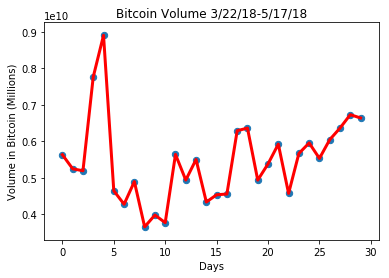

In [107]:
#Built a list, just to see how to change the data around, and plot it with matplotlib
mylist = []
mylist.extend(train.head(30).volume)
#Plotting the list of historical volume data
plt.plot(list(range(0,30)),mylist,color='red',linewidth=3)
plt.scatter(list(range(0,30)),mylist,s=40,zorder=2)
plt.xlabel('Days')
plt.ylabel('Volume in Bitcoin (Millions)')
plt.title('Bitcoin Volume 3/22/18-5/17/18')
plt.show()

In [86]:
import numpy as np
from fbprophet import Prophet
#Starting Changepoints
from fbprophet.plot import add_changepoints_to_plot

# Start of Prophet, built dataFrame with dates and volumes, then fit the data

In [87]:
#Building dictionary that is converted to a pandas dataframe in the prophet format
#It containts the dates and the volumes for those dates
d = {'ds':pd.to_datetime(train.head(30).date),'y':train.head(30).volume}
bc_df = pd.DataFrame(d,columns=['ds','y'])

#Start Prophet
bc_prophet = Prophet()
bc_prophet.fit(bc_df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.
/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


# Finding Kurtosis

In [88]:
bc_df.y.kurtosis()
#The kurtosis is less than 3, which means there are fewer outliers than there are in a normal distribution

1.6004112272910231

In [89]:
bc_df.y.skew()
#The skew is positive, which means that that the the graph is asymmetric, 
#with a longer right tail and the mass on the left side.

0.936021532685579

# Creating Future and Forecast with 30 periods, then the volume is plotted with prophet

In [97]:
#Build future, periods set to 30 because there are 30 days of data
future = bc_prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = bc_prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2018-05-12,3.528931e+09,2.305945e+09,4.790354e+09
56,2018-05-13,3.495318e+09,2.320743e+09,4.634676e+09
57,2018-05-14,4.062105e+09,2.887889e+09,5.346113e+09
58,2018-05-15,3.825583e+09,2.609592e+09,5.010148e+09
59,2018-05-16,3.585859e+09,2.476307e+09,4.814714e+09


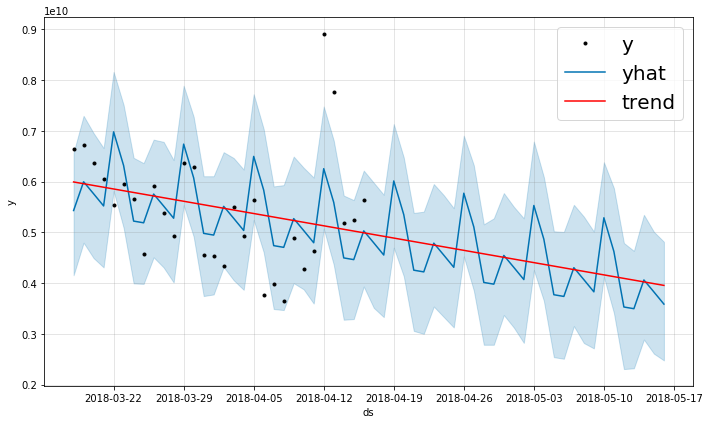

In [98]:
#Build the plot to show the forecasted data
bc_Volume = bc_prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), bc_prophet, forecast)
plt.legend(loc='best', fontsize=20)

# Daily Forecasts by plotting prophet components

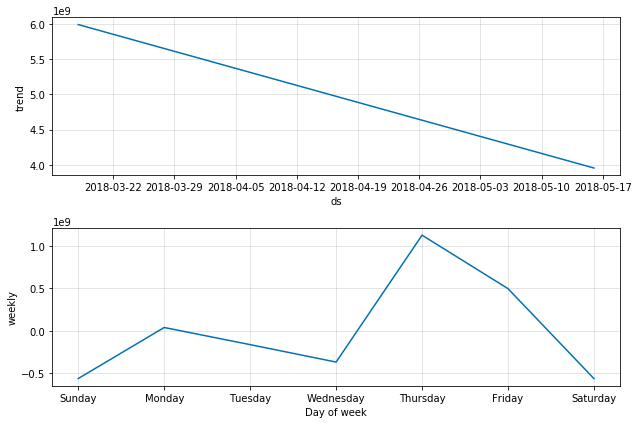

In [99]:
fig2 = bc_prophet.plot_components(forecast,uncertainty=False)

# Build the prophet graph of volume data with a changepoint scale of .5; this makes the plotting more flexible

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.
/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


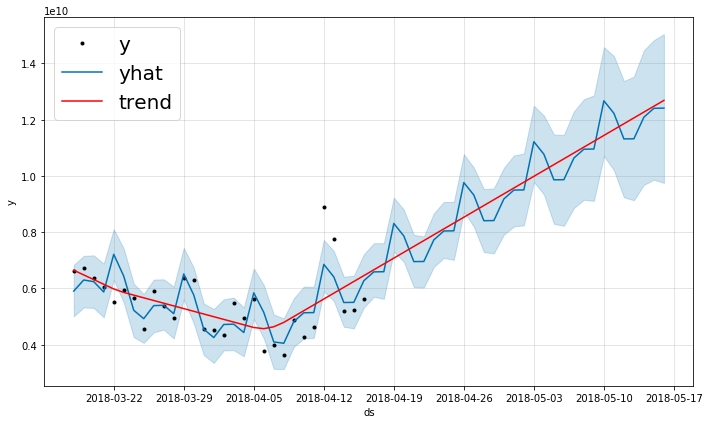

In [100]:
#Making the plotting more flexible (Alters the graph quite a bit, actually trends upwards instead of down)
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(bc_df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), bc_prophet, forecast)
plt.legend(loc='best', fontsize=20)

# Daily Forecasts by plotting prophet components

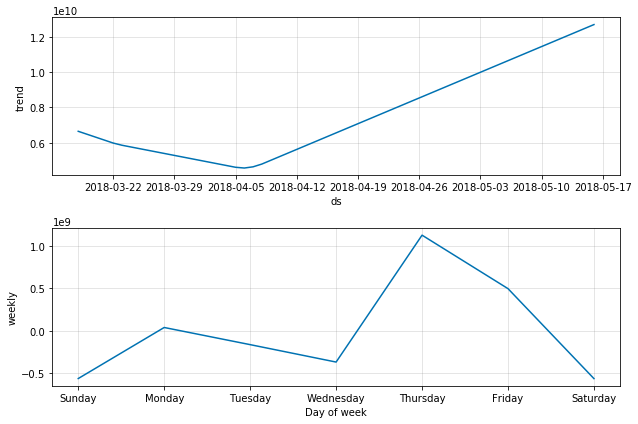

In [93]:
fig2 = bc_prophet.plot_components(forecast,uncertainty=False)

In [94]:
##### From this data, it appears that the volume spikes on Thursdays and falls on the weekend and wednesday.

# My attempt at Log volume with a cap and floor, though the graph doesn't seem to change

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.
/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


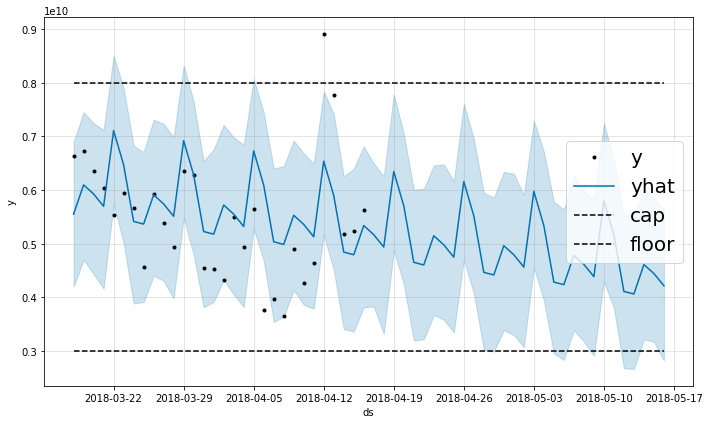

In [95]:
bc_df['cap'] = 8000000000
bc_df['floor'] = 3000000000
bc_Volume_Logistic = Prophet(growth = 'logistic')
bc_Volume_Logistic.fit(bc_df)
future_logistic = bc_Volume_Logistic.make_future_dataframe(periods=30)
future_logistic['cap'] = 8000000000
future_logistic['floor'] = 3000000000
fcst_logistic = bc_Volume_Logistic.predict(future_logistic)
fig_logistic = bc_Volume_Logistic.plot(fcst_logistic)
plt.legend(loc='best', fontsize=20)

In [ ]:
#Not sure how the logistics and the caps and floors help us determine anything more from the data.